<a href="https://colab.research.google.com/github/Hubobv/Midterms_test/blob/main/food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
import os 
import numpy as np
from numpy import save
from keras.utils import to_categorical, load_img, img_to_array
from keras.models import Sequential,Model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, LeakyReLU, Activation, Dropout
from keras.optimizers import Adam,SGD
import matplotlib.pyplot as plt

# specify the folder here
folder = '/content/drive/MyDrive/monan'

photos, labels = list(), list()

for file in os.listdir(folder):
    output = None
    if file.startswith('banhbeo'):
        output = 0
    elif file.startswith('banhxeo'):
        output = 1
    elif file.startswith('banhcuon'):
        output = 2
    elif file.startswith('boluclac'):
        output = 3
    elif file.startswith('bunbohue'):
        output = 4
    elif file.startswith('buncha'):
        output = 5
    elif file.startswith('bunrieu'):
        output = 6
    elif file.startswith('canhchua'):
        output = 7
    elif file.startswith('caolau'):
        output = 8
    elif file.startswith('goicuon'):
        output = 9
    elif file.startswith('goixoai'):
        output = 10
    elif file.startswith('raumuong'):
        output = 11
    elif file.startswith('thitkho'):
        output = 12
    elif file.startswith('thitluoc'):
        output = 13   
    if output is not None:
        photo = load_img(os.path.join(folder, file), target_size=(200, 200, 3))
        photo = img_to_array(photo)
        photos.append(photo)
        labels.append(output)

photos = np.array(photos)
labels = np.array(labels)

# Normalize images
photos= photos.astype('float32')/255

# One-hot encode labels
labels = to_categorical(labels,14)

# Save photos and labels to disk
save('/content/drive/MyDrive/monan/monan_photos.npy', photos)
save('/content/drive/MyDrive/monan/monan_labels.npy', labels)

# Define the model
model = Sequential()
model.add(Conv2D(64,(3,3), padding='same', input_shape=(200, 200,3)))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(14, activation='softmax'))

# Compile the model
#model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])
from keras.losses import categorical_crossentropy
sgd = SGD(lr = 0.001, decay = 1e-6, momentum = 0.9, nesterov= True)
model.compile(loss= categorical_crossentropy, optimizer= sgd, metrics = ['accuracy'])
classes=['banhbeo','banhxeo','banhcuon','boluclac','bunbohue','buncha','bunrieu','canhchua','caolau','goicuon','goixoai','raumuong','thitkho','thitluoc']
# Train the model
history = model.fit(photos, labels, batch_size=128, epochs=60, verbose=1)

Epoch 1/60
1/1 [==============================] - 1s 1s/step - loss: 2.6535 - accuracy: 0.1053
Epoch 2/60
1/1 [==============================] - 0s 169ms/step - loss: 2.6456 - accuracy: 0.1053
Epoch 3/60
1/1 [==============================] - 0s 185ms/step - loss: 2.6179 - accuracy: 0.1053
Epoch 4/60
1/1 [==============================] - 0s 174ms/step - loss: 2.5641 - accuracy: 0.2105
Epoch 5/60
1/1 [==============================] - 0s 172ms/step - loss: 2.5637 - accuracy: 0.2105
Epoch 6/60
1/1 [==============================] - 0s 169ms/step - loss: 2.5225 - accuracy: 0.2105
Epoch 7/60
1/1 [==============================] - 0s 161ms/step - loss: 2.5018 - accuracy: 0.2105
Epoch 8/60
1/1 [==============================] - 0s 172ms/step - loss: 2.4242 - accuracy: 0.1579
Epoch 9/60
1/1 [==============================] - 0s 171ms/step - loss: 2.5184 - accuracy: 0.1579
Epoch 10/60
1/1 [==============================] - 0s 167ms/step - loss: 2.4541 - accuracy: 0.1579
Epoch 11/60
1/1 [=====

In [ ]:
from keras.models import load_model
model.save('model1.h5')

1/1 [==============================] - 0s 406ms/step
[[2.1033540e-05 3.5400309e-03 2.4232981e-04 2.7700231e-04 9.2442075e-05
  4.3728742e-06 1.9647432e-05 9.1527001e-04 1.2891967e-04 4.0870020e-04
  3.6830719e-05 2.9184579e-07 9.9419820e-01 1.1501399e-04]]


'thitkho'

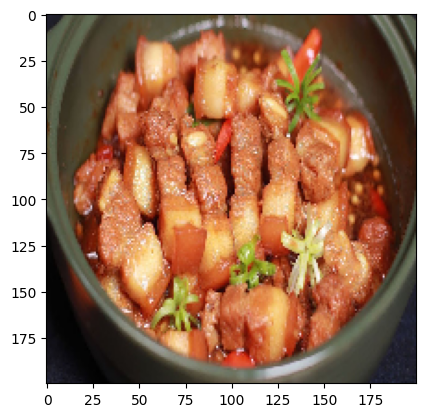

In [ ]:
from keras.utils import load_img
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
model10=load_model('model1.h5')
img=load_img('/content/drive/MyDrive/Thitkho.jpg', target_size=(200,200)) 
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3)  
img = img.astype('float32')
img /= 255
y_pred = model10.predict(img)
print(y_pred)
y_classes = [np.argmax(i) for i in y_pred]
y_classes
classes[y_classes[0]]